2. Chargement des librairies

In [956]:
import numpy as np 
import pandas as pd 

2. Chargement des données  

In [958]:
data = pd.read_csv("Data/studentscores.csv")

In [959]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


3. Analyse des données 

In [961]:
#analyse des données 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [962]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [963]:
data['Hours'].max()

9.2

In [964]:
data['Scores'].max()

95

In [965]:
print('max score:',data['Scores'].max())

max score: 95


In [966]:
print('min score:',data['Scores'].min())

min score: 17


4. Division des données 

Variable indep et dep 

In [969]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [970]:
x = data.iloc[:,:-1].values
y= data.iloc[:,-1]

In [971]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [972]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

4.1 Séparation des données : Train et test 

In [974]:
#X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [975]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size = 0.25, random_state= 40)

In [976]:
x_train

array([[3.2],
       [5.9],
       [1.9],
       [3.5],
       [8.3],
       [2.5],
       [3.8],
       [2.7],
       [2.5],
       [2.7],
       [7.7],
       [6.9],
       [4.5],
       [5.1],
       [6.1],
       [1.5],
       [5.5],
       [9.2]])

In [977]:
x_test

array([[8.9],
       [7.8],
       [1.1],
       [7.4],
       [3.3],
       [8.5],
       [4.8]])

In [978]:
y_train

2     27
11    62
17    24
4     30
8     81
16    30
22    35
20    30
0     21
9     25
10    85
23    76
12    41
1     47
18    67
5     20
7     60
6     88
Name: Scores, dtype: int64

In [979]:
y_test

15    95
24    86
14    17
19    69
13    42
3     75
21    54
Name: Scores, dtype: int64

In [980]:
print('x_train shape:', x_train.shape)

x_train shape: (18, 1)


In [981]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', x_test.shape)

x_train shape: (18, 1)
x_test shape: (7, 1)
y_train shape: (18,)
y_test shape: (7, 1)


5. construire  le modèle 

In [983]:
# importer le modèle de la linear regression  
from sklearn.linear_model import LinearRegression 

In [984]:
modele_lineaire = LinearRegression()

In [985]:
# entrainement du modèle 
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [986]:
y_scores_predict = modele_lineaire.predict(x_test)

In [987]:
y_scores_predict

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [988]:
y_test

15    95
24    86
14    17
19    69
13    42
3     75
21    54
Name: Scores, dtype: int64

In [989]:
resultats = pd.DataFrame(y_test,y_scores_predict)

In [990]:
resultats

,Scores
90.348621,NaN
79.201258,NaN
11.303688,NaN
75.147672,NaN
33.598413,NaN
86.295034,NaN
48.799361,NaN


In [991]:
# Evaluation du modele 
from sklearn.metrics import mean_squared_error, r2_score 

In [992]:
print("MSE:", mean_squared_error(y_test,y_scores_predict))

MSE: 51.90159659147337


In [993]:
print("R2:", r2_score(y_test,y_scores_predict))

R2: 0.9168569951293908


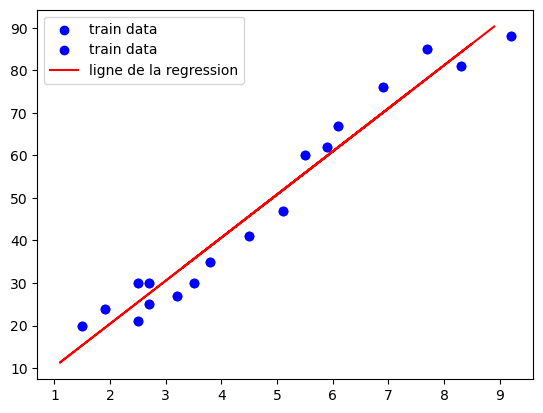

In [994]:
# importer matplotlib 
import matplotlib.pyplot as plt 
plt.scatter(x_train, y_train, color="blue",label= 'train data')
plt.scatter(x_train, y_train, color="blue",label= 'train data')
plt.plot(x_test, y_scores_predict, color='red', label ='ligne de la regression')
plt.legend()
plt.show()


7. Prediction

In [996]:
modele_lineaire.predict([[2.5]])

array([25.49124])

In [999]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [1001]:
resultats = pd.DataFrame({'y_score_real':y_test,'y_scores_predict':y_scores_predict})
resultats

,y_score_real,y_scores_predict
15,95,90.348621
24,86,79.201258
14,17,11.303688
19,69,75.147672
13,42,33.598413
3,75,86.295034
21,54,48.799361


In [1003]:
y_scores_predict

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [1005]:
modele_lineaire.predict([[10]])

array([101.49598285])

In [1007]:
resultats = pd.DataFrame({'y_score_real':y_test,'y_scores_predict':y_scores_predict,'soustraction': y_test-y_scores_predict})
resultats

,y_score_real,y_scores_predict,soustraction
15,95,90.348621,4.651379
24,86,79.201258,6.798742
14,17,11.303688,5.696312
19,69,75.147672,-6.147672
13,42,33.598413,8.401587
3,75,86.295034,-11.295034
21,54,48.799361,5.200639
